In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
import os.path

import time

from NeuralNet import NeuralNet
from utils.json import *

np.random.seed(1)

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X, Y = df.drop('label', axis=1), df['label']
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(42000, 784), y=(42000,)


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.values.reshape((Y.shape[0], 1)), test_size = 0.2, random_state=10) # Y.values

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
encoder = OneHotEncoder()

In [7]:
Y_train.shape

(33600, 1)

In [8]:
Y_train_e = encoder.fit_transform(Y_train).toarray()
Y_train_e.shape

(33600, 10)

In [18]:
cls = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 100, \
                         normalize = False, mini_batch_size=2048)

In [51]:
cls.parameters = read_from_json("nets/main_nn_300")

(60, 784)
(10, 60)
Cost after iteration 0: 0.227411
Cost after iteration 10: 0.058715
Cost after iteration 20: 0.042321
Cost after iteration 30: 0.032171
Cost after iteration 40: 0.031101
Cost after iteration 50: 0.027039
Cost after iteration 60: 0.026326
Cost after iteration 70: 0.025702
Cost after iteration 80: 0.022156
Cost after iteration 90: 0.023481


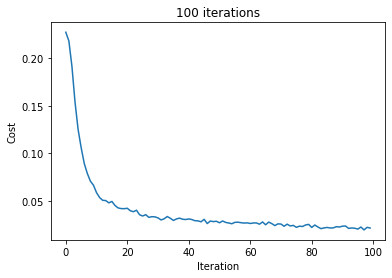

In [28]:
cls.fit(X_train, Y_train_e)

Cost after iteration 0: 0.014836
Cost after iteration 10: 0.013312
Cost after iteration 20: 0.013716
Cost after iteration 30: 0.012622
Cost after iteration 40: 0.010922
Cost after iteration 50: 0.012157
Cost after iteration 60: 0.010848
Cost after iteration 70: 0.010839
Cost after iteration 80: 0.010587
Cost after iteration 90: 0.010630


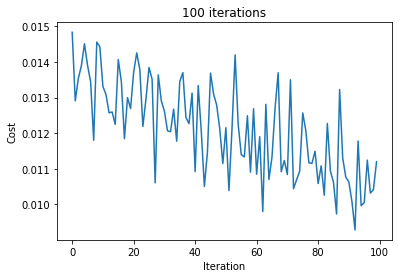

In [11]:
cls.keep_fitting(X_train, Y_train_e, 100)

In [22]:
cls.num_iter

100

In [31]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.9714583333333333
0.9571428571428572


In [32]:
save_to_json(cls.parameters, "nets/main_nn_300")

In [33]:
Y_dist = cls.predict_proba(X_train)
np.round(Y_dist[:10], 2)

array([[0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.92, 0.  , 0.08],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.99, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.06, 0.04, 0.  , 0.02, 0.  , 0.  , 0.88, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.  ]])

## Distillation

In [54]:
cls_dist = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 100, \
                         normalize = False, mini_batch_size=2048)

(60, 784)
(10, 60)
Cost after iteration 0: 0.227234
Cost after iteration 10: 0.059339
Cost after iteration 20: 0.039293
Cost after iteration 30: 0.033050
Cost after iteration 40: 0.028629
Cost after iteration 50: 0.028406
Cost after iteration 60: 0.027682
Cost after iteration 70: 0.025049
Cost after iteration 80: 0.023368
Cost after iteration 90: 0.021994


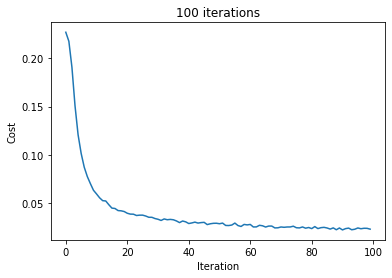

In [55]:
cls_dist.fit(X_train, Y_dist)

Cost after iteration 0: 0.023859
Cost after iteration 10: 0.022480
Cost after iteration 20: 0.021478
Cost after iteration 30: 0.020805
Cost after iteration 40: 0.022206
Cost after iteration 50: 0.020504
Cost after iteration 60: 0.019667
Cost after iteration 70: 0.020517
Cost after iteration 80: 0.019857
Cost after iteration 90: 0.020025
Cost after iteration 100: 0.020586
Cost after iteration 110: 0.019638
Cost after iteration 120: 0.018932
Cost after iteration 130: 0.018685
Cost after iteration 140: 0.019087
Cost after iteration 150: 0.019300
Cost after iteration 160: 0.017331
Cost after iteration 170: 0.018421
Cost after iteration 180: 0.019506
Cost after iteration 190: 0.018647


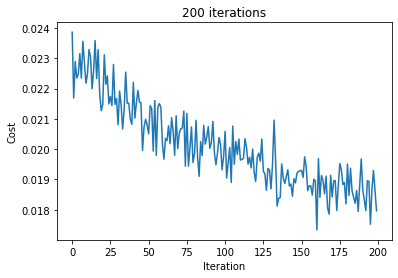

In [56]:
cls_dist.keep_fitting(X_train, Y_dist, 200)

In [57]:
cls_dist.num_iter

300

In [58]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.9462202380952381
0.9396428571428571


In [59]:
save_to_json(cls.parameters, "nets/distilled_nn_300")